In [84]:
import pandas as pd 
from matplotlib.patches import Shadow
import matplotlib.pyplot as plt

df = pd.read_csv('dados_steam/games.csv')

# top_games = df[(df['positive_ratio'] >= 90) & (df['rating'] == 'Overwhelmingly Positive')].sort_values(by=['user_reviews', 'positive_ratio'], ascending=[False, True]).head(5)
# top_games[['title','user_reviews','positive_ratio']]

test = df[(df['price_final'] >= 190)].sort_values(['price_final'],ascending=False).head(5)
test[['title','price_final']]



,title,price_final
5024,Clickteam Fusion 2.5 Developer Upgrade,299.99
22126,Aartform Curvy 3D 3.0,299.90
19819,Houdini Indie,269.99
81,3DF Zephyr Lite Steam Edition,199.99
12918,Hidden Post-Apocalyptic 3 Top-Down 3D,199.99


<Axes: >

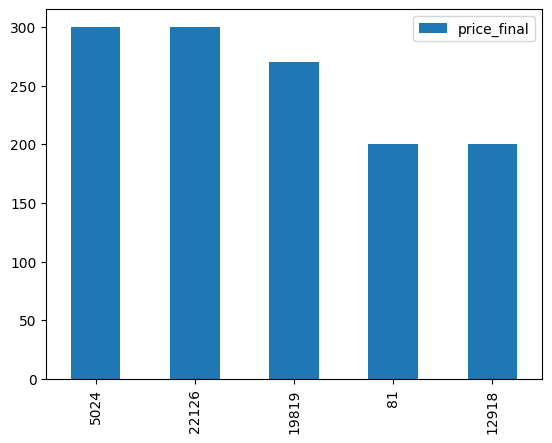

In [64]:

test[['title','price_final']].plot.bar()

#### TOP 5 JOGOS MAIS POPULARES DOS ULTIMOS 5 ANOS

In [34]:
import datetime

df['date_release']= pd.to_datetime(df['date_release'])


,title,user_reviews,positive_ratio
14453,ELDEN RING,528702,92
15096,Raft,240299,93
15281,Vampire Survivors,197109,98
13274,Stray,111376,97
14414,God of War,76981,96


In [33]:
dados=df.loc[(df['date_release'].dt.year==2019) & (df['positive_ratio']>=90)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head(5)
dados[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
12712,Red Dead Redemption 2,410074,90
14774,People Playground,195164,98
13598,Halo: The Master Chief Collection,192874,92
48122,Sekiro™: Shadows Die Twice - GOTY Edition,176988,95
14432,Slay the Spire,117359,97


In [32]:
dados=df.loc[(df['date_release'].dt.year==2020) & (df['positive_ratio']>=90)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head(5)
dados[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
13203,Phasmophobia,486466,96
15719,Sea of Thieves 2023 Edition,253844,90
13503,Hades,214267,98
49905,tModLoader,188684,97
14375,Deep Rock Galactic,187823,97


In [31]:
dados=df.loc[(df['date_release'].dt.year==2021) & (df['positive_ratio']>=90)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head(5)
dados[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
48183,Valheim,356617,95
11968,Crab Game,144524,92
41096,Muck,139841,94
14461,It Takes Two,114704,95
15286,Totally Accurate Battle Simulator,104218,98


In [30]:
dados=df.loc[(df['date_release'].dt.year==2022) & (df['positive_ratio']>=90)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head(5)
dados[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
14453,ELDEN RING,528702,92
15096,Raft,240299,93
15281,Vampire Survivors,197109,98
13274,Stray,111376,97
14414,God of War,76981,96


In [29]:
dados=df.loc[(df['date_release'].dt.year==2023) & (df['positive_ratio']>=90)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head(5)
dados[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
14770,Baldur's Gate 3,269840,95
48259,Hogwarts Legacy,156547,92
48035,Aimlabs,89133,93
13576,Resident Evil 4,55455,97
12751,DAVE THE DIVER,51463,97


#### TOP 5 JOGOS MAIS POPULARES NO MAC, WINDOWS E LINUX

In [86]:
mac=df.loc[(df['positive_ratio']>=90) & (df['mac']==True)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head()
mac[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
47380,Team Fortress 2,985819,93
13035,Terraria,943413,97
15363,Garry's Mod,853733,96
12711,Left 4 Dead 2,574470,97
47637,Unturned,515016,91


In [87]:
win=df.loc[(df['positive_ratio']>=90) & (df['win']==True)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head(5)
win[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
47380,Team Fortress 2,985819,93
13035,Terraria,943413,97
15363,Garry's Mod,853733,96
12800,The Witcher® 3: Wild Hunt,668455,96
47791,Wallpaper Engine,637341,98


In [88]:
linux=df.loc[(df['positive_ratio']>=90) & (df['linux']==True)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head(5)
linux[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
47380,Team Fortress 2,985819,93
13035,Terraria,943413,97
15363,Garry's Mod,853733,96
12711,Left 4 Dead 2,574470,97
47637,Unturned,515016,91


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,440,Team Fortress 2,2007-10-10,True,True,True,Very Positive,93,985819,0.0,0.0,0.0,True
1,105600,Terraria,2011-05-16,True,True,True,Overwhelmingly Positive,97,943413,10.0,0.0,0.0,True
2,4000,Garry's Mod,2006-11-29,True,True,True,Overwhelmingly Positive,96,853733,10.0,0.0,0.0,True


#### PLATAFORMA MAIS COMPATIVEL COM OS JOGOS

In [81]:
game = (df['win']==True).value_counts()
game


win
True     50076
False      796
Name: count, dtype: int64

In [15]:
game = (df['mac']==True).value_counts()
game

mac
False    37854
True     13018
Name: count, dtype: int64

In [25]:
game = (df['linux']==True).value_counts()
game

linux
False    41831
True      9041
Name: count, dtype: int64

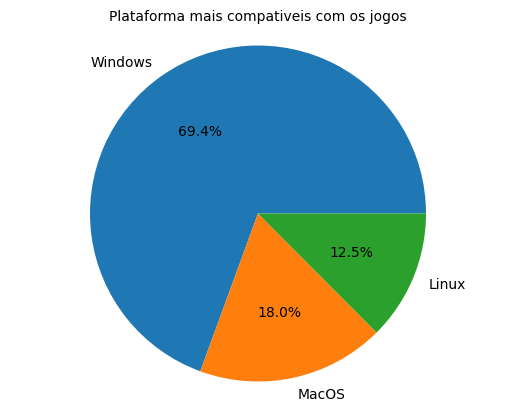

In [53]:
from matplotlib.patches import Shadow
import matplotlib.pyplot as plt
labels = 'Windows',"MacOS","Linux"
sizes = [50076,13018
,9041]
fig1,ax1 = plt.subplots()

ax1.pie(sizes,labels=labels,autopct='%1.1f%%')

ax1.set_title("Plataforma mais compativeis com os jogos",size=10)

ax1.axis('equal')
plt.show()

#### TOP 5 MENOS POPULARES DOS ULTIMOS 5 ANOS

In [39]:
import datetime

df['date_release']= pd.to_datetime(df['date_release'])

dados=df.loc[(df['date_release'].dt.year==2019) & (df['positive_ratio']<=15)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head(5)
dados[['title','user_reviews','positive_ratio']]


,title,user_reviews,positive_ratio
34364,TEKKEN 7 - DLC13: Frame Data Display,605,14
37568,NEW LIFE,134,11
29368,CENTRALIA,26,11
33215,Event Horizon - Frontier,22,13
35751,AXE:SURVIVAL,20,5


In [40]:
dados=df.loc[(df['date_release'].dt.year==2020) & (df['positive_ratio']<=15)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head(5)
dados[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
31687,CODE VEIN: Frozen Empress,267,11
41977,CODE VEIN: Lord of Thunder,223,12
24785,NTBSS Top Secret Training Set - Season Pass 1 ...,123,14
24443,Yakuza: Like a Dragon Karaoke Set,74,12
32417,Orlando Theme Park VR - Roller Coaster and Rides,38,13


In [41]:
dados=df.loc[(df['date_release'].dt.year==2021) & (df['positive_ratio']<=15)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head(5)
dados[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
3247,War of the Three Kingdoms,21276,15
3440,Expansion - Europa Universalis IV: Leviathan,4723,10
20307,NTBSS Top Secret Training Set - Season Pass 3 ...,269,14
23004,Kingdom Heroes 8 Create your own original off...,123,14
35560,校长模拟器,61,11


In [42]:
dados=df.loc[(df['date_release'].dt.year==2022) & (df['positive_ratio']<=15)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head(5)
dados[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
22086,Tricolour Lovestory TrueEnd,1739,14
30768,SuperPower 3,880,10
36509,Need for Speed™ Unbound Palace Upgrade,250,12
43990,Tiny Tina's Wonderlands: Season Pass,164,10
38832,NTBSS Top Secret Training Set - Season Pass 4 ...,125,15


In [43]:
dados=df.loc[(df['date_release'].dt.year==2023) & (df['positive_ratio']<=15)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head(5)
dados[['title','user_reviews','positive_ratio']]

,title,user_reviews,positive_ratio
14286,Overwatch® 2,181198,9
14292,NBA 2K24,439,10
47295,SQUARE ENIX AI Tech Preview: THE PORTOPIA SERI...,341,13
50299,Wo Long: Fallen Dynasty Battle of Zhongyuan,338,14
47284,Teravit,99,12


#### TOP 5 JOGS GRATIS MAIS BEM AVAILADOS

In [46]:
dados=df.loc[(df['price_final'] == 0) & (df['positive_ratio']>=90)].sort_values(['user_reviews','positive_ratio'],ascending=[False,False]).head(5)
dados[['title','user_reviews','positive_ratio','price_final']]

,title,user_reviews,positive_ratio,price_final
47380,Team Fortress 2,985819,93,0.0
47637,Unturned,515016,91,0.0
49905,tModLoader,188684,97,0.0
18596,Doki Doki Literature Club!,184949,96,0.0
27666,SCP: Secret Laboratory,154538,91,0.0


In [45]:
df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True
